In [1]:
import BondGraphTools as bgt

In [2]:
model=bgt.new(name='circuit_2')

In [3]:
# Parameters' values

C1_value=150*1e-6     #(150 uF)
C2_value=100*1e-6     #(100 uF)
C3_value=220*1e-6     #(220 uF)

R1_value=100*1e3      #(100 k)
R2_value=10*1e3       #(10 k)


In [4]:
E1=bgt.new("C", value=C1_value)
E2=bgt.new("C", value=C2_value)
E3=bgt.new("C", value=C3_value)
R1=bgt.new("R", value=R1_value)
R2=bgt.new("R", value=R2_value)

In [5]:
zero_junc=bgt.new("0")
one_junc1=bgt.new("1")
one_junc2=bgt.new("1")

In [6]:
bgt.add(model,E1,E2,E3,R1,R2,zero_junc,one_junc1,one_junc2)

In [7]:
bgt.connect(E1,one_junc1)
bgt.connect(one_junc1,R1)
bgt.connect(one_junc1,zero_junc)
bgt.connect(zero_junc,E2)
bgt.connect(zero_junc,one_junc2)
bgt.connect(one_junc2,R2)
bgt.connect(one_junc2,E3)

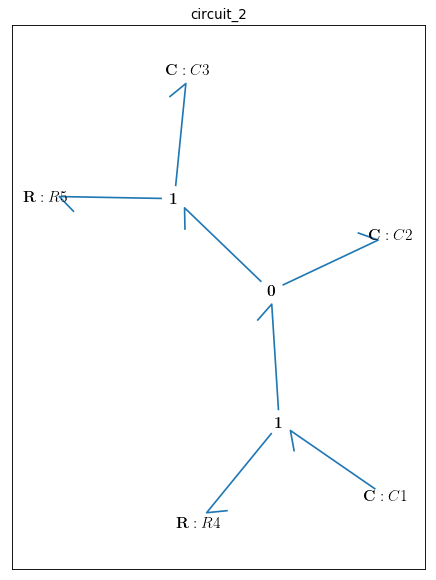

In [19]:
bgt.draw(model)

In [9]:
timespan=[0,60]

In [10]:
model.state_vars

{'x_0': (C: C1, 'q_0'), 'x_1': (C: C2, 'q_0'), 'x_2': (C: C3, 'q_0')}

In [11]:
x0={"x_0":1, "x_1":0, "x_2":0}

In [12]:
model.constitutive_relations

[dx_0 + x_0/15 - x_1/10,
 dx_1 - x_0/15 + 11*x_1/10 - 5*x_2/11,
 dx_2 - x_1 + 5*x_2/11]

In [13]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)

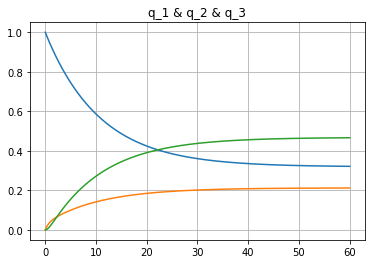

In [14]:
import matplotlib.pyplot as plt
fig=plt.plot(t,x)
plt.title("q_1 & q_2 & q_3")
plt.grid()

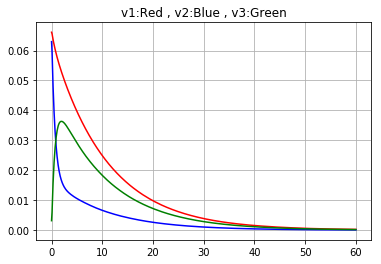

In [15]:
# - dq_1/dt = v1 (current)
import numpy as np
f = np.array(x[:,0], dtype=float)
slope=np.gradient(f,0.1)
v1=-slope
# dq_2/dt = v2 (current)
f = np.array(x[:,1], dtype=float)
slope=np.gradient(f,0.1)
v2=slope
# dq_3/dt = v3 (current)
f = np.array(x[:,2], dtype=float)
slope=np.gradient(f,0.1)
v3=slope

for v, c in [(v1,'r'), (v2,'b'), (v3,'g')]:
    fig=plt.plot(t,v,c)
    plt.title("v1:Red , v2:Blue , v3:Green")
    plt.grid()

In [16]:
u11=R1._params['r']*v1
u1=x[:,0]/E1._params['C']
u2=x[:,1]/E2._params['C']
u22=R2._params['r']*v3
u3=x[:,2]/E3._params['C']

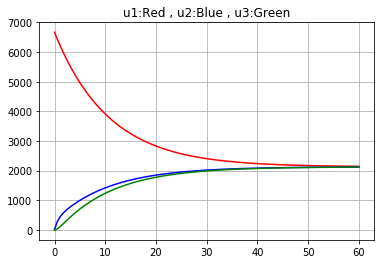

In [17]:
for u, c in [(u1,'r'), (u2,'b'), (u3,'g')]:
    fig=plt.plot(t,u,c)
    plt.title("u1:Red , u2:Blue , u3:Green")
    plt.grid()
